In [1]:
#Import dependencies
from nn import NeuralNetwork
from nn import preprocess
from nn import io
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

# Rationale for Sampling Scheme
Because the relative abundance of negative examples is much greater than that of positive examples, I decided to sample a small fraction of the negative examples. In my implementation of sample_seqs, I randomly sample, with replacement, 137 known negative examples. From each of these 137 sequences, I randomly select a 17-mer to ensure that all examples are of the same sequence length. 

In [2]:
#Process data for training
pos_file = 'data/rap1-lieb-positives.txt'
neg_file = 'data/yeast-upstream-1k-negative.fa'

#Load sequences and labels
pos_seqs = io.read_text_file(pos_file)
pos_labels = [1] * len(pos_seqs)
neg_seqs = io.read_fasta_file(neg_file)
neg_labels = [0] * len(neg_seqs)
seqs = pos_seqs + neg_seqs
labels = pos_labels + neg_labels

#Sample sequences
seed = 1 #set seed for reproducibility
sampled_seqs, sampled_labels = preprocess.sample_seqs(seqs,labels,1)

#Generate training and validation sets
split_percent = .3
X_train, X_val, y_train, y_val = train_test_split(sampled_seqs, sampled_labels, test_size=split_percent, random_state=42)

#Reshape and one hot encode training and validation sets  
X_train = np.array(preprocess.one_hot_encode_seqs(X_train)).T
X_val = np.array(preprocess.one_hot_encode_seqs(X_val)).T
y_train = np.array([y_train])
y_val = np.array([y_val])

print(X_train.shape)
print(X_val.shape)

X = np.concatenate((X_train, X_val),axis=1)
y = np.concatenate((y_train, y_val),axis=1)

(68, 191)
(68, 83)


In [3]:
#Define hyperparameters
nn_arch = [{'input_dim' :  68, 'output_dim' : 34, 'activation' : 'sigmoid'}, 
           {'input_dim' : 34, 'output_dim' : 16, 'activation' : 'sigmoid'}, 
           {'input_dim' : 16, 'output_dim' : 8, 'activation' : 'sigmoid'}, 
           {'input_dim' : 8, 'output_dim' : 1, 'activation' : 'sigmoid'}]
lr = 0.0001
seed1 = 1
seed2 = 2
batch_size = 30
epochs = 4000
loss_function = 'mse'

In [4]:
#Train classifier
classifier = NeuralNetwork(nn_arch, lr, seed2, batch_size, epochs, loss_function)
train_loss, val_loss = classifier.fit(X_train, y_train, X_val, y_val)

AssertionError: 

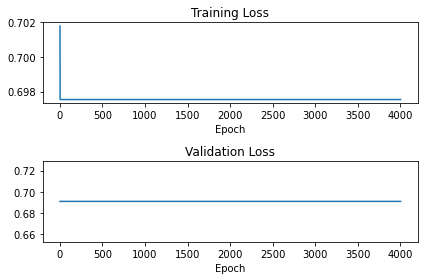

In [5]:
#Plot losses
epochs = np.linspace(1, len(train_loss), len(train_loss))
fig,axs = plt.subplots(2)
axs[0].plot(epochs, train_loss)
axs[0].set_title('Training Loss')
axs[0].set_xlabel('Epoch')

axs[1].plot(epochs, val_loss)
axs[1].set_title('Validation Loss')
axs[1].set_xlabel('Epoch')
fig.tight_layout()
plt.show()

In [23]:
prediction = classifier.predict(X)
output,cache = classifier.forward(X)

[[0.56870515 0.56906614 0.56871619 0.56891135 0.56887496 0.56892291
  0.56867659 0.56869873 0.56859732 0.56871159 0.56887005 0.56887193
  0.56866522 0.56877657 0.56882761 0.56870667 0.56872053 0.56902015
  0.56878527 0.56903658 0.56877631 0.56894248 0.56921586 0.56877145
  0.56894787 0.56884674 0.5690316  0.56865231 0.56869717 0.56902465
  0.56890757 0.56887083 0.56901852 0.56909794 0.56893523 0.56872848
  0.56875511 0.56900322 0.56876414 0.5688394  0.56886019 0.56880849
  0.56871892 0.56881948 0.56885579 0.56876121 0.5687251  0.56900662
  0.56888665 0.56889598 0.56864806 0.56901874 0.56896668 0.56901141
  0.56893549 0.56878078 0.56877889 0.56871554 0.56846394 0.56871923
  0.56898856 0.56923686 0.56919052 0.56879915 0.56891117 0.56894672
  0.56887533 0.56885959 0.56900043 0.56892549 0.56903044 0.56885719
  0.56895357 0.56850883 0.56854824 0.5686898  0.56906778 0.56872771
  0.56896822 0.56880384 0.56882731 0.56879619 0.56891747 0.56891488
  0.56894298 0.56899786 0.56887753 0.5689643  0.